Crea una gráfica que describa cuántos alumnos por escuela tuvieron el mejor puntaje en "reading" (mejor 10% de los puntajes), y con ello saber qué género es el que predomina en este filtro. Es importante imprimir el resultado de cuál es el género que mejor puntaje obtuvo para facilitar la interpretación de los resultados para el usuario.

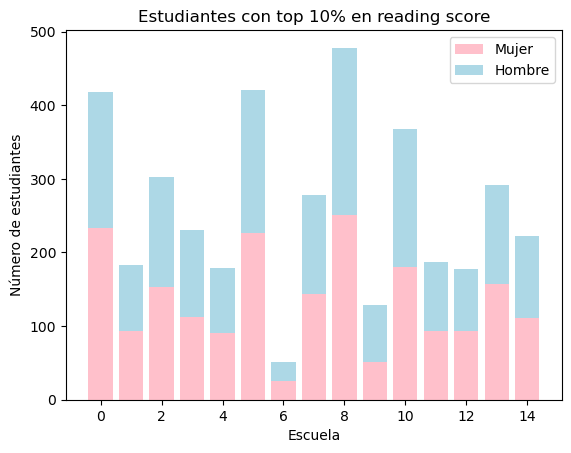

El género que mejor puntaje obtuvo es Mujer


In [5]:
import pandas as pd
df = pd.read_csv('cleanstudentscomplete.csv')

# Filtrar el mejor 10%
df = df.sort_values(by='reading_score', ascending=False)
mejores = df.head(int(len(df)*0.1))

# Obtener la cuenta de alumnos por género y escuela
counts = mejores.groupby(['school_name', 'gender']).size().reset_index(name='counts')

fig, ax = plt.subplots()
for i, school in enumerate(counts['school_name'].unique()):
    school_counts = counts[counts['school_name'] == school]
    ax.bar(i, school_counts[school_counts['gender'] == 'Mujer']['counts'].values[0], color='pink')
    ax.bar(i, school_counts[school_counts['gender'] == 'Hombre']['counts'].values[0],
           bottom=school_counts[school_counts['gender'] == 'Mujer']['counts'].values[0], color='lightblue')


import matplotlib.pyplot as plt

ax.legend(['Mujer', 'Hombre'])
ax.set_xlabel('Escuela')
ax.set_ylabel('Número de estudiantes')
ax.set_title('Estudiantes con top 10% en reading score')

plt.show()

counts_by_gender = mejores.groupby('gender').size().reset_index(name='counts')
best_gender = counts_by_gender[counts_by_gender['counts'] == counts_by_gender['counts'].max()]['gender'].values[0]
print(f'El género que mejor puntaje obtuvo es {best_gender}')


Crea una gráfica que describa cuántos alumnos por escuela tuvieron el peor puntaje en "reading" (peor 10% de los puntajes), y con ello saber qué género es el que predomina en este filtro. Es importante imprimir el resultado de cuál es el género que peor puntaje obtuvo para facilitar la interpretación de los resultados para el usuario.

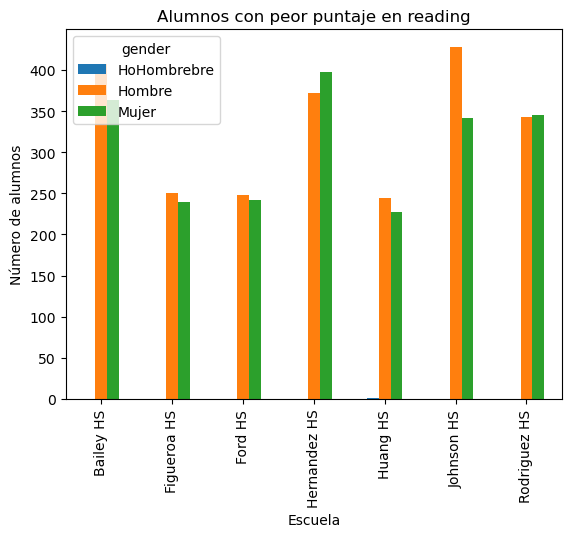

El género que peor puntaje obtuvo es: Hombre


In [11]:
import pandas as pd

df = pd.read_csv("cleanstudentscomplete.csv")

# Obtener el puntaje que corresponde al peor 10% de los puntajes
peor_calificacion = df["reading_score"].quantile(0.1)

peor_stud = df[df["reading_score"] <= peor_calificacion]

# Agrupar los alumnos por escuela y género y contar cuántos obtuvieron el peor puntaje en reading
peor_calif_cuenta = peor_stud.groupby(["school_name", "gender"])["reading_score"].count()

import matplotlib.pyplot as plt

# Crear la gráfica de barras
peor_calif_cuenta.unstack().plot(kind="bar")

plt.title("Alumnos con peor puntaje en reading")
plt.xlabel("Escuela")
plt.ylabel("Número de alumnos")

plt.show()

peor_cuentagenero = peor_stud["gender"].value_counts()

print("El género que peor puntaje obtuvo es:", peor_cuentagenero.index[0])
